# 版图电容预测基本模型

## 基本库导入

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append(os.path.join(os.getcwd(), '..'))

from config import *
from data.layout import convert_data, convert_data_parallel

## 数据导入与数据清洗

In [ ]:
def data_process(x, reserve_num):
	raw_num = np.array([len(i) for i in x]).reshape(-1, 1)
	valid_num = np.array([reserve_num if len(i) > reserve_num else len(i) for i in x]).reshape(-1, 1)
	new_x = np.zeros(shape=(len(x), reserve_num, 5), dtype=np.float32)
	for i in range(len(x)):
		num = min(len(x[i]), reserve_num)
		new_x[i][:num] = x[i][:num]

	return new_x, valid_num, raw_num

def data_process2(x, y, thresh): # [400 2500]
	thresh = np.array(thresh, dtype=np.int32)
	raw_num = np.array([len(i) for i in x]).reshape(-1, 1)
	valid_num = np.array([thresh[1] if len(i) > thresh[1] else len(i) for i in x], dtype=np.int32).reshape(-1, 1)
	sum_reserve = np.sum(valid_num >= thresh[0], dtype=np.int32)
	new_x = np.zeros(shape=(sum_reserve, thresh[1], 5), dtype=np.float32)
	new_y = np.zeros(shape=(sum_reserve, 1), dtype=np.float32)
	index = 0
	for i, num in enumerate(valid_num):
		num = num[0]
		if num >= thresh[0]:
			new_x[index][:num] = x[i][:num]
			new_y[index][0] = y[i][0]
			index += 1
	valid_num = valid_num[valid_num>=thresh[0]].reshape(-1, 1)
	new_y = np.concatenate([valid_num, new_y], axis=1)

	return new_x, new_y, raw_num

x_total = []
x_couple = []
y_total = []
y_couple = []
raw_nums = []
if len(pattern_nums) == 0:
	print("pattern_nums is empty, please check the config.py")
for pattern_num in pattern_nums:
	dir_prj = "D:/learn_more_from_life/computer/EDA/work/prj/rc_predict/"
	dir_load = os.path.join(dir_prj, "data/convert_data/pattern{}".format(pattern_num))
	if not os.path.exists(dir_load):
		# convert_data(pattern_num)
		convert_data_parallel(pattern_num, num_process=8)

# data process 1
# x_total_ = np.load(os.path.join(dir_load, "x_total.npy"), allow_pickle=True)
# x_total_, total_valid_num, total_raw_nums = data_process(x_total_, reserve_num)
# x_couple_ = np.load(os.path.join(dir_load, "x_couple.npy"), allow_pickle=True)
# x_couple_, couple_valid_num, _ = data_process(x_couple_, reserve_num)
# y_total_ = np.load(os.path.join(dir_load, "y_total.npy")).reshape(-1, 1)
# y_total_ = np.concatenate([total_valid_num, y_total_], axis=1)
# y_couple_ = np.load(os.path.join(dir_load, "y_couple.npy")).reshape(-1, 1)
# y_couple_ = np.concatenate([couple_valid_num, y_couple_], axis=1)

# data process 2
x_total_ = np.load(os.path.join(dir_load, "x_total.npy"), allow_pickle=True)
y_total_ = np.load(os.path.join(dir_load, "y_total.npy")).reshape(-1, 1)
x_total_, y_total_, total_raw_nums = data_process2(x_total_, y_total_, thresh)
x_couple_ = np.load(os.path.join(dir_load, "x_couple.npy"), allow_pickle=True)
y_couple_ = np.load(os.path.join(dir_load, "y_couple.npy")).reshape(-1, 1)
x_couple_, y_couple_, _ = data_process2(x_couple_, y_couple_, thresh)

# concatenate data
if len(x_total) == 0:
	x_total = x_total_.copy()
	x_couple = x_couple_.copy()
	y_total = y_total_.copy()
	y_couple = y_couple_.copy()
	raw_nums = total_raw_nums.copy()
else:
	x_total = np.concatenate([x_total, x_total_], axis=0)
	x_couple = np.concatenate([x_couple, x_couple_], axis=0)
	y_total = np.concatenate([y_total, y_total_], axis=0)
	y_couple = np.concatenate([y_couple, y_couple_], axis=0)
	raw_nums = np.concatenate([raw_nums, total_raw_nums],  axis=0)
print("load data from {}".format(dir_load))

print('raw nums shape:', raw_nums.shape)
print('raw nums mean:', np.mean(raw_nums))
print('raw nums max:', np.max(raw_nums))
print('raw nums min:', np.min(raw_nums))

valid_num = y_total[:, 0]
print('valid nums shape:', valid_num.shape)
print('valid nums mean:', np.mean(valid_num))
print('valid nums max:', np.max(valid_num))
print('valid nums min:', np.min(valid_num))

print(x_total.shape)
print('x total first 10 samples:')
print(x_total[0][:10])
print('x couple first 10 samples:')
print(x_couple[0][:10])

print(y_total.shape)
print('y total first 10 samples:')
print(y_total[:10])
print('y couple first 10 samples:')
print(y_couple[:10])

(640, 2000, 5)
[[ 0.00e+00  0.00e+00  0.00e+00  3.20e-02  1.00e+02]
 [-1.33e-01  0.00e+00  0.00e+00 -1.20e-01 -1.00e+02]
 [ 7.30e-02  0.00e+00  0.00e+00  3.20e-02  1.00e+02]
 ...
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]]
(640, 2)
[[1848.            4.71537018]
 [1848.            4.71537018]
 [1488.            3.26024795]
 [1488.            3.26024795]
 [1284.            2.67295098]
 [1284.            2.67295098]
 [1372.            3.07517195]
 [1372.            3.07517195]
 [1956.            5.36869097]
 [1956.            5.36869097]]


## 数据分割

In [ ]:
# data split 6:2:2
from sklearn.model_selection import train_test_split

x_total_train, x_total_valid_test, y_total_train, y_total_valid_test = train_test_split(x_total, y_total, test_size=0.4, random_state=seed, shuffle=True)
x_total_valid, x_total_test, y_total_valid, y_total_test = train_test_split(x_total_valid_test, y_total_valid_test, test_size=0.5, random_state=seed, shuffle=True)
print('total x len:', len(x_total_train), len(x_total_valid), len(x_total_test))
print('x total train first 10\n', x_total_train[0][:10])
print('x total train last 10\n', x_total_train[0][-10:])
print('y total train first 10\n', y_total_train[:10])

x_couple_train, x_couple_valid_test, y_couple_train, y_couple_valid_test = train_test_split(x_couple, y_couple, test_size=0.4, random_state=seed, shuffle=True)
x_couple_valid, x_couple_test, y_couple_valid, y_couple_test = train_test_split(x_couple_valid_test, y_couple_valid_test, test_size=0.5, random_state=seed, shuffle=True)
print('couple x len', len(x_couple_train), len(x_couple_valid), len(x_couple_test))
print('x couple train first 10\n', x_couple_train[0][:10])
print('x couple train last 10\n', x_couple_train[0][-10:])
print('y couple train first 10\n', y_couple_train[:10])

total x len: 384 128 128
x total train first 10
 [[ 0.00e+00  0.00e+00  3.20e-02  1.00e+02  0.00e+00]
 [ 8.90e-02  0.00e+00  3.20e-02  1.00e+02  0.00e+00]
 [-1.72e-01  0.00e+00  1.20e-01  1.00e+02  0.00e+00]
 [ 2.17e-01  0.00e+00  3.20e-02  1.00e+02  0.00e+00]
 [ 3.06e-01  0.00e+00  3.20e-02  1.00e+02  0.00e+00]
 [ 4.34e-01  0.00e+00  3.20e-02  1.00e+02  0.00e+00]
 [ 5.23e-01  0.00e+00  3.20e-02  1.00e+02  0.00e+00]
 [ 6.51e-01  0.00e+00  3.20e-02  1.00e+02  0.00e+00]
 [ 7.40e-01  0.00e+00  3.20e-02  1.00e+02  0.00e+00]
 [ 8.68e-01  0.00e+00  3.20e-02  1.00e+02  0.00e+00]]
x total train last 10
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
y total train first 10
 [[1380.            7.71336603]
 [1284.            9.43041134]
 [ 692.            8.08362389]
 [1008.            9.28992271]
 [ 984.            7.78516483]
 [1236.           10.47247601]
 [ 812

## 数据预处理

In [ ]:
from sklearn.preprocessing import StandardScaler


def cal_mean_std(x, y):
	num_s = 0
	num_sum = round(np.sum(y[:, 0]))
	x_valid = np.zeros((num_sum, 5), dtype=np.float32)
	for i in range(len(x)):
		num = round(y[i][0])
		x_valid[num_s:num_s+num, :] = x[i][:num]
		num_s += num
	mean = np.mean(x_valid, axis=0)
	std = np.std(x_valid, axis=0)
	std[std == 0] = 1

	return mean, std

def get_mask(x, y):
	mask = np.zeros(shape=x.shape, dtype=np.int32)
	for i in range(len(x)):
		num = round(y[i][0])
		mask[i][:num] = 1

	return mask

def data_process(x, y, mean, std):
	mask = get_mask(x, y)

	return np.multiply((x - mean) / std, mask)

# x
# total
mean_total, std_total = cal_mean_std(x_total_train, y_total_train)
print('mean total:', mean_total)
print('std total:', std_total)
x_total_train_std = data_process(x_total_train, y_total_train, mean_total, std_total)
x_total_train_std_flat = x_total_train_std.reshape(len(x_total_train_std), -1)
x_total_valid_std = data_process(x_total_valid, y_total_valid, mean_total, std_total)
x_total_valid_std_flat = x_total_valid_std.reshape(len(x_total_valid_std), -1)
x_total_test_std = data_process(x_total_test, y_total_test, mean_total, std_total)
x_total_test_std_flat = x_total_test_std.reshape(len(x_total_test_std), -1)
print('x total train std flat first 20\n', x_total_train_std_flat[0][:20])
print('x total train std flat last 20\n', x_total_train_std_flat[0][-20:])

# couple
mean_couple, std_couple = cal_mean_std(x_couple_train, y_couple_train)
print('mean couple:', mean_couple)
print('std couple:', std_couple)
x_couple_train_std = data_process(x_couple_train, y_couple_train, mean_couple, std_couple)
x_couple_train_std_flat = x_couple_train_std.reshape(len(x_couple_train_std), -1)
x_couple_valid_std = data_process(x_couple_valid, y_couple_valid, mean_couple, std_couple)
x_couple_valid_std_flat = x_couple_valid_std.reshape(len(x_couple_valid_std), -1)
x_couple_test_std = data_process(x_couple_test, y_couple_test, mean_couple, std_couple)
x_couple_test_std_flat = x_couple_test_std.reshape(len(x_couple_test_std), -1)
print('x couple train std flat first 20\n', x_couple_train_std_flat[0][:20])
print('x couple train std flat last 20\n', x_couple_train_std_flat[0][-20:])

# y
# total
scaler_yt = StandardScaler()
y_total_train_std = y_total_train[:, 1].copy().reshape(-1, 1)
# scaler_yt.fit(y_total_train_std)
# y_total_train_std = scaler_yt.transform(y_total_train_std)
# print('y total train std first 10\n', y_total_train_std[:10].reshape(-1))

# # couple
scaler_yc = StandardScaler()
y_couple_train_std = y_couple_train[:, 1].copy().reshape(-1, 1)
# scaler_yc.fit(y_couple_train_std)
# y_couple_train_std = scaler_yc.transform(y_couple_train_std)
# print('y couple train std first 10\n', y_couple_train_std[:10].reshape(-1))

if DISABLE_STD:
	x_total_train_std_flat = x_total_train.reshape(len(x_total_train), -1)
	x_total_valid_std_flat = x_total_valid.reshape(len(x_total_valid), -1)
	x_total_test_std_flat = x_total_test.reshape(len(x_total_test), -1)
	x_couple_train_std_flat = x_couple_train.reshape(len(x_couple_train), -1)
	x_couple_valid_std_flat = x_couple_valid.reshape(len(x_couple_valid), -1)
	x_couple_test_std_flat = x_couple_test.reshape(len(x_couple_test), -1)


mean total: [7.4687828e+01 0.0000000e+00 6.1754137e-02 1.0000000e+02 0.0000000e+00]
std total: [4.3193623e+01 1.0000000e+00 2.2523755e-02 1.0000000e+00 1.0000000e+00]
x total train std flat first 20
 [-1.72914016  0.         -1.3210113   0.          0.         -1.72707975
  0.         -1.3210113   0.          0.         -1.73312223  0.
  2.58597469  0.          0.         -1.72411621  0.         -1.3210113
  0.          0.        ]
x total train std flat last 20
 [-0.  0. -0. -0.  0. -0.  0. -0. -0.  0. -0.  0. -0. -0.  0. -0.  0. -0.
 -0.  0.]
mean couple: [7.4687828e+01 0.0000000e+00 6.1579026e-02 9.9810188e+01 0.0000000e+00]
std couple: [4.3193623e+01 1.0000000e+00 2.2968883e-02 6.1557627e+00 1.0000000e+00]
x couple train std flat first 20
 [-1.72914016e+00  0.00000000e+00 -1.28778684e+00  3.08347996e-02
  0.00000000e+00 -1.73312223e+00  0.00000000e+00 -7.90543556e+00
 -3.24590454e+01  0.00000000e+00 -1.72707975e+00  0.00000000e+00
 -1.28778684e+00  3.08347996e-02  0.00000000e+00 -1

## 降维处理

#### 传统降维方法

In [ ]:
# 初始维度 10000维
from sklearn import decomposition
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2

USE_DDR_PCA = False
USE_DDR_KPCA = False
USE_DDR_VAR = False
USE_DDR_AE = True

if USE_DDR_PCA:
	pca_total = decomposition.PCA(n_components=n_components, copy=True, whiten=True)
	pca_total.fit(x_total_train_std_flat)
	pca_couple = decomposition.PCA(n_components=n_components, copy=True, whiten=True)
	pca_couple.fit(x_couple_train_std_flat)
	ddr_total = pca_total
	ddr_couple = pca_couple
elif USE_DDR_KPCA:
	kpca_total = decomposition.KernelPCA(n_components=n_components, kernel='rbf')
	kpca_total.fit(x_total_train_std_flat)
	kpca_couple = decomposition.KernelPCA(n_components=n_components, kernel='rbf')
	kpca_couple.fit(x_couple_train_std_flat)
	ddr_total = kpca_total
	ddr_couple = kpca_couple
elif USE_DDR_VAR:
	var_total = VarianceThreshold(threshold=0.5)
	var_total.fit(x_total_train_std_flat)
	var_couple = VarianceThreshold(threshold=0.5)
	var_couple.fit(x_couple_train_std_flat)
	ddr_total = var_total
	ddr_couple = var_couple
else:
	ddr_total = None
	ddr_couple = None

# transform
if ddr_total is not None and ddr_couple is not None:
	x_total_train_std_flat_ddr = ddr_total.transform(x_total_train_std_flat)
	x_total_valid_std_flat_ddr = ddr_total.transform(x_total_valid_std_flat)
	x_total_test_std_flat_ddr = ddr_total.transform(x_total_test_std_flat)
	x_couple_train_std_flat_ddr = ddr_couple.transform(x_couple_train_std_flat)
	x_couple_valid_std_flat_ddr = ddr_couple.transform(x_couple_valid_std_flat)
	x_couple_test_std_flat_ddr = ddr_couple.transform(x_couple_test_std_flat)

# plot
# ratio = ddr_total.explained_variance_ratio_
# cum_ratio = np.cumsum(ratio)
# print(f'total cum ratio {cum_ratio}')
# plt.plot(range(n_components), cum_ratio)
# plt.show()
# print(f'total sum ratio {np.sum(ratio)}')

# ratio = ddr_couple.explained_variance_ratio_
# cum_ratio = np.cumsum(ratio)
# print(f'couple cum ratio {cum_ratio}')
# plt.plot(range(n_components), cum_ratio)
# plt.show()
# print(f'couple sum ratio {np.sum(ratio)}')

#### 新型降维方法

##### 自编码器

Epoch 1/100
12/12 [==============================] - 1s 22ms/step - loss: 1806.6533 - val_loss: 1865.3601
Epoch 2/100
12/12 [==============================] - 0s 14ms/step - loss: 1804.9340 - val_loss: 1865.3005
Epoch 3/100
12/12 [==============================] - 0s 14ms/step - loss: 1804.9150 - val_loss: 1865.2826
Epoch 4/100
12/12 [==============================] - 0s 14ms/step - loss: 1804.9037 - val_loss: 1865.2765
Epoch 5/100
12/12 [==============================] - 0s 14ms/step - loss: 1804.9025 - val_loss: 1865.2761
Epoch 6/100
12/12 [==============================] - 0s 15ms/step - loss: 1804.9017 - val_loss: 1865.2593
Epoch 7/100
12/12 [==============================] - 0s 14ms/step - loss: 1804.8862 - val_loss: 1865.2568
Epoch 8/100
12/12 [==============================] - 0s 14ms/step - loss: 1804.8839 - val_loss: 1865.2568
Epoch 9/100
12/12 [==============================] - 0s 14ms/step - loss: 1804.8824 - val_loss: 1865.2507
Epoch 10/100
12/12 [==========================

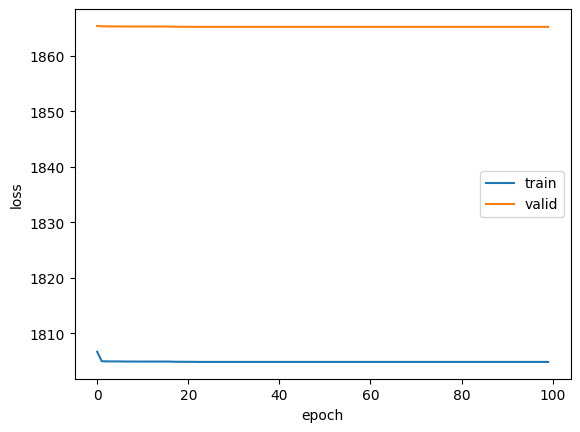

In [ ]:
import tensorflow as tf
from tensorflow import keras

# encoding dim 100
encoding_dim = n_components

# input dim 10000
input_dim = x_total_train_std_flat.shape[1]
input_layer = keras.layers.Input(shape=(input_dim,))
# encoding layer
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
# decoding layer
decoded = keras.layers.Dense(input_dim, activation='sigmoid')(encoded)

# autoencoder
autoencoder = keras.models.Model(input_layer, decoded)
# encoder
encoder = keras.models.Model(input_layer, encoded)
# decoder
encoded_input = keras.layers.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.models.Model(encoded_input, decoder_layer(encoded_input))

# compile
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

if USE_DDR_AE:
	# fit
	autoencoder.fit(x_total_train_std_flat, x_total_train_std_flat,
									epochs=100,
									batch_size=32,
									shuffle=True,
									validation_data=(x_total_valid_std_flat, x_total_valid_std_flat))

	# history
	history = autoencoder.history.history
	plt.plot(history['loss'], label='train')
	plt.plot(history['val_loss'], label='valid')
	plt.legend()
	plt.xlabel('epoch')
	plt.ylabel('loss')
	plt.show()

In [ ]:
# encode data
x_total_train_std_flat_ddr = encoder.predict(x_total_train_std_flat)
x_total_valid_std_flat_ddr = encoder.predict(x_total_valid_std_flat)
x_total_test_std_flat_ddr = encoder.predict(x_total_test_std_flat)
x_couple_train_std_flat_ddr = encoder.predict(x_couple_train_std_flat)
x_couple_valid_std_flat_ddr = encoder.predict(x_couple_valid_std_flat)
x_couple_test_std_flat_ddr = encoder.predict(x_couple_test_std_flat)


if DISABLE_DDR:
	x_total_train_std_flat_ddr = x_total_train_std_flat
	x_total_valid_std_flat_ddr = x_total_valid_std_flat
	x_total_test_std_flat_ddr = x_total_test_std_flat
	x_couple_train_std_flat_ddr = x_couple_train_std_flat
	x_couple_valid_std_flat_ddr = x_couple_valid_std_flat
	x_couple_test_std_flat_ddr = x_couple_test_std_flat

4/4 [==============================] - 0s 2ms/step


## 命名简化

In [41]:
# total 
xt_train = x_total_train_std_flat_ddr
xt_valid = x_total_valid_std_flat_ddr
xt_test = x_total_test_std_flat_ddr
yt_train = y_total_train[:, 1].reshape(-1, 1)
yt_valid = y_total_valid[:, 1].reshape(-1, 1)
yt_test = y_total_test[:, 1].reshape(-1, 1)

# couple
xc_train = x_couple_train_std_flat_ddr
xc_valid = x_couple_valid_std_flat_ddr
xc_test = x_couple_test_std_flat_ddr
yc_train = y_couple_train[:, 1].reshape(-1, 1)
yc_valid = y_couple_valid[:, 1].reshape(-1, 1)
yc_test = y_couple_test[:, 1].reshape(-1, 1)

## 模型预测

### 线性回归

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


def model_analysis(model, scaler, x_train, y_train, x_valid, y_valid, x_test, y_test, name):
	model.fit(x_train, y_train.ravel())
	y_valid_predict = model.predict(x_valid).reshape(-1, 1)
	# y_valid_predict = scaler.inverse_transform(y_valid_predict) # disable
	y_test_predict = model.predict(x_test).reshape(-1, 1)
	# y_test_predict = scaler.inverse_transform(y_test_predict)
	mse_train = mean_squared_error(y_train, model.predict(x_train))
	mse_valid = mean_squared_error(y_valid, y_valid_predict)
	mse_test = mean_squared_error(y_test, y_test_predict)
	r2_train = r2_score(y_train, model.predict(x_train))
	r2_valid = r2_score(y_valid, y_valid_predict)
	r2_test = r2_score(y_test, y_test_predict)
	print(f"{name} train mse:", mse_train)
	print(f"{name} train r2:", r2_train)
	print(f"{name} valid mse:", mse_valid)
	print(f"{name} valid r2:", r2_valid)
	print(f"{name} test mse:", mse_test)
	print(f"{name} test r2:", r2_test)
	print('')
	analysis_result(y_valid, y_valid_predict, title=f'{name} valid analysis')
	analysis_result(y_test, y_test_predict, title=f'{name} test analysis')
	print('')


def analysis_result(y, y_predict, title):
	relative_error = np.abs(y - y_predict) / y
	max_error = np.max(relative_error)
	mean_error = np.mean(relative_error)
	std_error = np.std(relative_error)
	num_good = np.sum(relative_error <= 0.05) / len(y)
	num_bad = np.sum(relative_error > 0.05) / len(y)
	print(title)
	print('max error:', max_error)
	print('mean error:', mean_error)
	print('std error:', std_error)
	print('good ratio:', num_good)
	print('bad ratio:', num_bad)
	print('')


# total
lr_t = LinearRegression()
model_analysis(lr_t, scaler_yt, xt_train, yt_train, xt_valid, yt_valid, xt_test, yt_test, 'linear total')

# couple
lr_c = LinearRegression()
model_analysis(lr_c, scaler_yc, xc_train, yc_train, xc_valid, yc_valid, xc_test, yc_test, 'linear couple')

linear total train mse: 0.0423310622142535
linear total train r2: 0.9536475076940744
linear total valid mse: 1105.0947513558
linear total valid r2: -1364.6367082643917
linear total test mse: 370.9678371522971
linear total test r2: -433.90681538903505

linear total valid analysis
max error: 28.091915320039632
mean error: 0.8846875560396843
std error: 4.247843332783904
good ratio: 0.6796875
bad ratio: 0.3203125

linear total test analysis
max error: 24.01778046241218
mean error: 0.29920470653376646
std error: 2.2268426215346606
good ratio: 0.7890625
bad ratio: 0.2109375


linear couple train mse: 0.027210383662961874
linear couple train r2: 0.9763630631832371
linear couple valid mse: 10682.515262769997
linear couple valid r2: -10260.0908046225
linear couple test mse: 3566.0065104426376
linear couple test r2: -3212.670369499975

linear couple valid analysis
max error: 206.39322786440223
mean error: 6.04930174981118
std error: 29.719160996835026
good ratio: 0.421875
bad ratio: 0.578125

li

### 支持向量机回归

In [43]:
from sklearn.svm import SVR

# total
# linear svr
lr_svf_t = SVR(kernel='linear')
model_analysis(lr_svf_t, scaler_yt, xt_train, yt_train, xt_valid, yt_valid, xt_test, yt_test, 'linear svr total')
# poly svr
poly_svf_t = SVR(kernel='poly')
model_analysis(poly_svf_t, scaler_yt, xt_train, yt_train, xt_valid, yt_valid, xt_test, yt_test, 'poly svr total')
# rbf svr
rbf_svf_t = SVR(kernel='rbf')
model_analysis(rbf_svf_t, scaler_yt, xt_train, yt_train, xt_valid, yt_valid, xt_test, yt_test, 'rbf svr total')

# couple
# linear svr
lr_svf_c = SVR(kernel='linear')
model_analysis(lr_svf_c, scaler_yc, xc_train, yc_train, xc_valid, yc_valid, xc_test, yc_test, 'linear svr couple')
# poly svr
poly_svf_c = SVR(kernel='poly')
model_analysis(poly_svf_c, scaler_yc, xc_train, yc_train, xc_valid, yc_valid, xc_test, yc_test, 'poly svr couple')
# rbf svr
rbf_svf_c = SVR(kernel='rbf')
model_analysis(rbf_svf_c, scaler_yc, xc_train, yc_train, xc_valid, yc_valid, xc_test, yc_test, 'rbf svr couple')

linear svr total train mse: 11711.060605294515
linear svr total train r2: -12822.605603224434
linear svr total valid mse: 18656.659726064492
linear svr total valid r2: -23054.235168073392
linear svr total test mse: 10904.9477314065
linear svr total test r2: -12783.4940042682

linear svr total valid analysis
max error: 53.87966593698904
mean error: 12.197408935387934
std error: 10.2113774069094
good ratio: 0.0
bad ratio: 1.0

linear svr total test analysis
max error: 46.87735238530485
mean error: 9.535446078714266
std error: 7.485074766344604
good ratio: 0.0078125
bad ratio: 0.9921875


poly svr total train mse: 0.7397557211535384
poly svr total train r2: 0.18996784915337905
poly svr total valid mse: 0.6994206510455597
poly svr total valid r2: 0.13568088671658962
poly svr total test mse: 0.7702635727308738
poly svr total test r2: 0.09697595350015009

poly svr total valid analysis
max error: 0.22126747230639457
mean error: 0.07870676827624433
std error: 0.05569698531909581
good ratio: 0.

### K近邻回归

In [44]:
from sklearn.neighbors import KNeighborsRegressor

# total 
# uniform knn
uni_knn_t = KNeighborsRegressor(n_neighbors=5, weights='uniform')
model_analysis(uni_knn_t, scaler_yt, xt_train, yt_train, xt_valid, yt_valid, xt_test, yt_test, 'uniform knn total')
# distance knn
dis_knn_t = KNeighborsRegressor(n_neighbors=5, weights='distance')
model_analysis(dis_knn_t, scaler_yt, xt_train, yt_train, xt_valid, yt_valid, xt_test, yt_test, 'distance knn total')

# couple
# uniform knn
uni_knn_c = KNeighborsRegressor(n_neighbors=5, weights='uniform')
model_analysis(uni_knn_c, scaler_yc, xc_train, yc_train, xc_valid, yc_valid, xc_test, yc_test, 'uniform knn couple')
# distance knn
dis_knn_c = KNeighborsRegressor(n_neighbors=5, weights='distance')
model_analysis(dis_knn_c, scaler_yc, xc_train, yc_train, xc_valid, yc_valid, xc_test, yc_test, 'distance knn couple')

uniform knn total train mse: 0.41719773125075665
uniform knn total train r2: 0.5431686894608825
uniform knn total valid mse: 0.7357416484085091
uniform knn total valid r2: 0.09079669265199575
uniform knn total test mse: 0.8582814926324313
uniform knn total test r2: -0.006212488752427969

uniform knn total valid analysis
max error: 0.25628169281548524
mean error: 0.07807178978939534
std error: 0.0628399045367515
good ratio: 0.4296875
bad ratio: 0.5703125

uniform knn total test analysis
max error: 0.2493623164914555
mean error: 0.08410373990854425
std error: 0.060022756341026
good ratio: 0.3515625
bad ratio: 0.6484375


distance knn total train mse: 1.5154547023812522e-07
distance knn total train r2: 0.9999998340577846
distance knn total valid mse: 0.6962077849359096
distance knn total valid r2: 0.1396512321486838
distance knn total test mse: 0.5826886001854054
distance knn total test r2: 0.31688082337420453

distance knn total valid analysis
max error: 0.25723678763072794
mean error: 0

### 回归树

In [45]:
from sklearn.tree import DecisionTreeRegressor

# total
dtr_t = DecisionTreeRegressor()
model_analysis(dtr_t, scaler_yt, xt_train, yt_train, xt_valid, yt_valid, xt_test, yt_test, 'decision tree total')

# couple
dtr_c = DecisionTreeRegressor()
model_analysis(dtr_c, scaler_yc, xc_train, yc_train, xc_valid, yc_valid, xc_test, yc_test, 'decision tree couple')

decision tree total train mse: 0.0
decision tree total train r2: 1.0
decision tree total valid mse: 0.8351008230317163
decision tree total valid r2: -0.03198783419679452
decision tree total test mse: 0.7135941085947479
decision tree total test r2: 0.16341280788202328

decision tree total valid analysis
max error: 0.38579567354851574
mean error: 0.0782878524462246
std error: 0.06993772360922255
good ratio: 0.46875
bad ratio: 0.53125

decision tree total test analysis
max error: 0.23813675107356858
mean error: 0.07019088706973142
std error: 0.06064844463550613
good ratio: 0.515625
bad ratio: 0.484375


decision tree couple train mse: 0.0
decision tree couple train r2: 1.0
decision tree couple valid mse: 0.9591695194053518
decision tree couple valid r2: 0.07866964909045626
decision tree couple test mse: 0.8023946946354035
decision tree couple test r2: 0.27688520835771013

decision tree couple valid analysis
max error: 0.8942117996874914
mean error: 0.17997847766673514
std error: 0.1784452

### 集成模型

#### 基础模型

In [46]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

# total
# random forest
rfr_t = RandomForestRegressor()
model_analysis(rfr_t, scaler_yt, xt_train, yt_train, xt_valid, yt_valid, xt_test, yt_test, 'random forest total')
# extra tree
etr_t = ExtraTreesRegressor()
model_analysis(etr_t, scaler_yt, xt_train, yt_train, xt_valid, yt_valid, xt_test, yt_test, 'extra tree total')
# gradient boosting
gbr_t = GradientBoostingRegressor()
model_analysis(gbr_t, scaler_yt, xt_train, yt_train, xt_valid, yt_valid, xt_test, yt_test, 'gradient boosting total')

# couple
# random forest
rfr_c = RandomForestRegressor()
model_analysis(rfr_c, scaler_yc, xc_train, yc_train, xc_valid, yc_valid, xc_test, yc_test, 'random forest couple')
# extra tree
etr_c = ExtraTreesRegressor()
model_analysis(etr_c, scaler_yc, xc_train, yc_train, xc_valid, yc_valid, xc_test, yc_test, 'extra tree couple')
# gradient boosting
gbr_c = GradientBoostingRegressor()
model_analysis(gbr_c, scaler_yc, xc_train, yc_train, xc_valid, yc_valid, xc_test, yc_test, 'gradient boosting couple')

random forest total train mse: 0.06896414031190096
random forest total train r2: 0.9244843002754652
random forest total valid mse: 0.6191781014159861
random forest total valid r2: 0.23484176971275872
random forest total test mse: 0.48764332668127897
random forest total test r2: 0.42830783422983687

random forest total valid analysis
max error: 0.25131771615669146
mean error: 0.07013448815858772
std error: 0.05698415192925845
good ratio: 0.46875
bad ratio: 0.53125

random forest total test analysis
max error: 0.21533601453938803
mean error: 0.06164784167487317
std error: 0.0474046817462038
good ratio: 0.5234375
bad ratio: 0.4765625


extra tree total train mse: 0.0
extra tree total train r2: 1.0
extra tree total valid mse: 0.579129435369613
extra tree total valid r2: 0.28433248388260635
extra tree total test mse: 0.39360627371054924
extra tree total test r2: 0.5385528504824995

extra tree total valid analysis
max error: 0.26827557795356954
mean error: 0.06326433149297928
std error: 0.05

#### XGBoost

In [ ]:
import xgboost as xgb


# total
# XGBoost extreme gradient boosting
xgb_t = xgb.XGBRegressor(booster='gbtree',
                         n_estimators=100,
                         learning_rate=0.1,
                         max_depth=6,
                         min_child_weight=3,
                         seed=42)
model_analysis(xgb_t, scaler_yt, xt_train, yt_train, xt_valid, yt_valid, xt_test, yt_test, 'XGBoost total')

# couple
# XGBoost extreme gradient boosting
xgb_c = xgb.XGBRegressor(booster='gbtree',
                         n_estimators=100,
                         learning_rate=0.1,
                         max_depth=6,
                         min_child_weight=3,
                         seed=42)
model_analysis(xgb_c, scaler_yc, xc_train, yc_train, xc_valid, yc_valid, xc_test, yc_test, 'XGBoost couple')

### 懒模型

In [47]:
from lazypredict.Supervised import LazyRegressor
import warnings

warnings.filterwarnings("ignore")

# total
reg_t = LazyRegressor(verbose=0, predictions=True, ignore_warnings=True)
models_t, predictions_t = reg_t.fit(xt_train, xt_valid, yt_train.ravel(), yt_valid.ravel())
print('total models')
print(models_t)
print('')

# couple
reg_c = LazyRegressor(verbose=0, predictions=True, ignore_warnings=True)
models_c, predictions_c = reg_c.fit(xc_train, xc_valid, yc_train.ravel(), yc_valid.ravel())
print('couple models')
print(models_t)

 98%|█████████▊| 41/42 [01:22<00:01,  1.05s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45011
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 391
[LightGBM] [Info] Start training from score 8.709861
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

100%|██████████| 42/42 [01:23<00:00,  1.98s/it]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 98%|█████████▊| 41/42 [01:17<00:01,  1.04s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45016
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 391
[LightGBM] [Info] Start training from score 3.837152
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

100%|██████████| 42/42 [01:17<00:00,  1.85s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f